<a href="https://colab.research.google.com/github/Thibooooo/Optimisation-Course/blob/main/Thibault_Germain_E8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total Days Used: 195
Maximum Profit: 84
Projects to undertake: [2, 4, 5, 6]


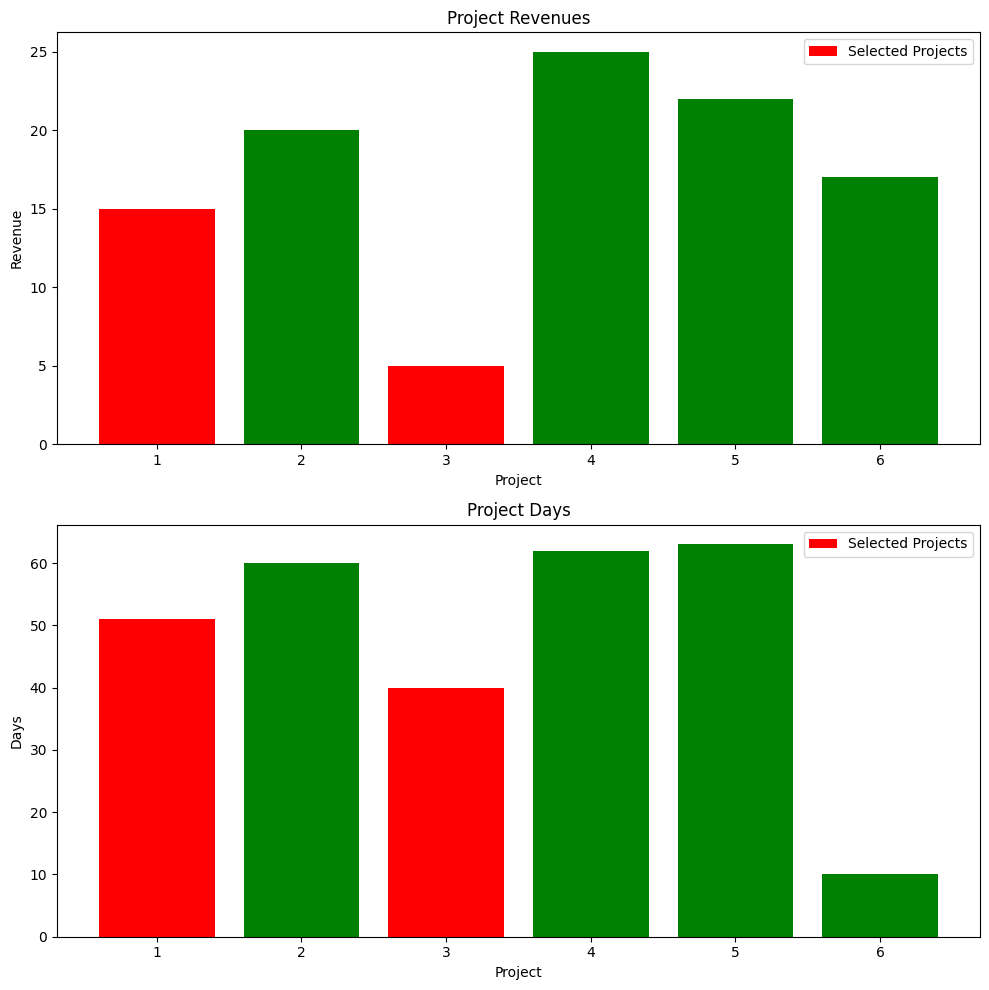

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('projects.csv')
days = df['Days'].tolist()
revenues = df['Revenue'].tolist()
max_days = 200
class Node:
    def __init__(self, level, profit, weight, bound, contains):
        self.level = level
        self.profit = profit
        self.weight = weight
        self.bound = bound
        self.contains = contains

def bound(node, n, max_days, revenues, days):
    if node.weight >= max_days:
        return 0
    profit_bound = node.profit
    j = node.level + 1
    total_weight = node.weight
    while j < n and total_weight + days[j] <= max_days:
        total_weight += days[j]
        profit_bound += revenues[j]
        j += 1
    if j < n:
        profit_bound += (max_days - total_weight) * revenues[j] / days[j]
    return profit_bound

def knapsack_branch_and_bound(max_days, revenues, days):
    n = len(revenues)
    queue = []
    u = Node(-1, 0, 0, 0.0, [0]*n)
    max_profit = 0
    best_set = [0]*n
    u.bound = bound(u, n, max_days, revenues, days)
    queue.append(u)
    while queue:
        u = queue.pop(0)
        if u.level == -1:
            level = 0
        else:
            level = u.level + 1
        if level == n:
            continue
        v_incl = Node(level, u.profit + revenues[level], u.weight + days[level], 0.0, u.contains[:])
        v_incl.contains[level] = 1
        if v_incl.weight <= max_days and v_incl.profit > max_profit:
            max_profit = v_incl.profit
            best_set = v_incl.contains[:]
        v_incl.bound = bound(v_incl, n, max_days, revenues, days)
        if v_incl.bound > max_profit:
            queue.append(v_incl)
        v_excl = Node(level, u.profit, u.weight, 0.0, u.contains[:])
        v_excl.bound = bound(v_excl, n, max_days, revenues, days)

        if v_excl.bound > max_profit:
            queue.append(v_excl)

    return max_profit, best_set
max_profit, best_set = knapsack_branch_and_bound(max_days, revenues, days)
selected_projects = [i+1 for i in range(len(best_set)) if best_set[i] == 1]
total_days_used = sum(days[i] for i in range(len(best_set)) if best_set[i] == 1)

print(f'Total Days Used: {total_days_used}')
print(f'Maximum Profit: {max_profit}')
print(f'Projects to undertake: {selected_projects}')
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].bar(range(1, len(revenues) + 1), revenues, color=['green' if best_set[i] else 'red' for i in range(len(revenues))])
ax[0].set_xlabel('Project')
ax[0].set_ylabel('Revenue')
ax[0].set_title('Project Revenues')
ax[0].set_xticks(range(1, len(revenues) + 1))
ax[0].legend(['Selected Projects', 'Discarded Projects'])
ax[1].bar(range(1, len(days) + 1), days, color=['green' if best_set[i] else 'red' for i in range(len(days))])
ax[1].set_xlabel('Project')
ax[1].set_ylabel('Days')
ax[1].set_title('Project Days')
ax[1].set_xticks(range(1, len(days) + 1))
ax[1].legend(['Selected Projects', 'Discarded Projects'])
plt.tight_layout()
plt.show()
